In [2]:
import matplotlib.ticker as ticker
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
!pip install openpyxl

You should consider upgrading via the 'C:\Users\rober\PycharmProjects\1xboba\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [26]:
df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

In [32]:
df["ratings_cnt_ya"].fillna(0, inplace=True)
df["reviews_cnt_yell"].fillna(0, inplace=True)
df["reviews_cnt_2gis"].fillna(0, inplace=True)
df["reviews_cnt_avito"].fillna(0, inplace=True)

df["rating_ya"].fillna(0, inplace=True)
df["rating_yell"].fillna(0, inplace=True)
df["rating_2gis"].fillna(0, inplace=True)
df["rating_avito"].fillna(0, inplace=True)
df["reviews_cnt"] = df["ratings_cnt_ya"] + df["reviews_cnt_2gis"] + df["reviews_cnt_yell"] + df["reviews_cnt_avito"]
df["reviews_cnt"].replace(0, 1, inplace=True)
df = df.dropna(subset=['ratings_cnt_ya', 'reviews_cnt_yell', "reviews_cnt_2gis", "reviews_cnt_avito"], how='all')

df["rating"] = (df["rating_ya"] * df["ratings_cnt_ya"] + df["rating_2gis"] * df["reviews_cnt_2gis"] + df["rating_yell"] * df["reviews_cnt_yell"] + df["rating_avito"] * df["reviews_cnt_avito"])\
                /df["reviews_cnt"]
df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0]["rating"] = df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0][["rating_ya", "rating_yell", "rating_2gis", "rating_avito"]].max(axis=1)

df = df[(df["rating"] > 0) & (df["rating"] < 5)]

C:\Users\rober\AppData\Local\Temp\ipykernel_10536\2469283118.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0]["rating"] = df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0][["rating_ya", "rating_yell", "rating_2gis", "rating_avito"]].max(axis=1)


# data analyze

## php_all

In [8]:
df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

data = "phb_all"

colms = [data]
df_clean = df
for c in colms:
    Q1 = df_clean[c].quantile(q=.25) # персентили
    Q3 = df_clean[c].quantile(q=.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[c] > (Q1-1.5*IQR)) & ((df_clean[c] < (Q3+1.5*IQR)))]

In [9]:
print(df_clean[data].describe())

count    13553.000000
mean       816.505202
std        794.106224
min          1.000000
25%        198.000000
50%        558.000000
75%       1203.000000
max       3530.000000
Name: phb_all, dtype: float64


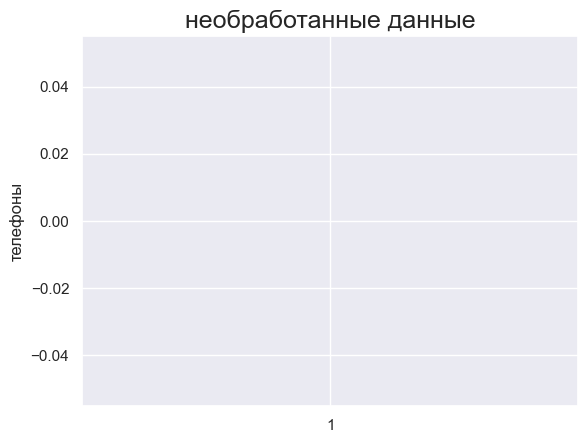

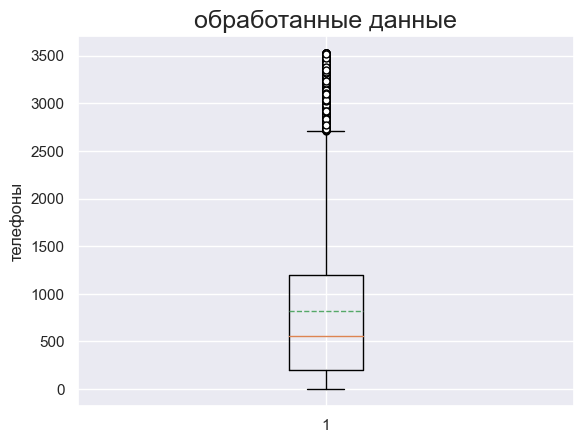

In [96]:
fig = plt.figure()

flierprops = dict(marker='o', markerfacecolor='white', markersize=5,
                  linestyle='none', )
plt.boxplot(df[data], flierprops=flierprops)
plt.ylabel("телефоны")
plt.title("необработанные данные", fontsize=18)

plt.show()

fig = plt.figure()
plt.title("обработанные данные", fontsize=18)
plt.ylabel("телефоны")
plt.boxplot(df_clean[data], flierprops=flierprops, meanline=True, showmeans=True)

plt.show()

## phb_bad_perc

In [12]:
df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

data = "phb_bad_perc"

colms = [data]
df_clean = df[df[data]>0]
for c in colms:
    Q1 = df_clean[c].quantile(q=.25) # персентили
    Q3 = df_clean[c].quantile(q=.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[c] > (Q1-1.5*IQR)) & ((df_clean[c] < (Q3+1.5*IQR)))]

In [13]:
print(df_clean[data].describe())

count    2464.000000
mean        0.210998
std         0.218799
min         0.010000
25%         0.060000
50%         0.120000
75%         0.290000
max         0.960000
Name: phb_bad_perc, dtype: float64


## phb_bad_perc_dir

In [10]:
df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

data = "phb_bad_perc_dir"

colms = [data]
df_clean = df[df[data]>0]
for c in colms:
    Q1 = df_clean[c].quantile(q=.25) # персентили
    Q3 = df_clean[c].quantile(q=.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[c] > (Q1-1.5*IQR)) & ((df_clean[c] < (Q3+1.5*IQR)))]

In [11]:
print(df_clean[data].describe())

count    1759.000000
mean        0.372013
std         0.292477
min         0.010000
25%         0.160000
50%         0.280000
75%         0.510000
max         1.410000
Name: phb_bad_perc_dir, dtype: float64


## mvd_request_num

In [5]:
df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

colms = ["mvd_request_num"]
df_clean = df[df["mvd_request_num"] > 0]
for c in colms:
    Q1 = df_clean[c].quantile(q=.25) # персентили
    Q3 = df_clean[c].quantile(q=.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[c] > (Q1-1.5*IQR)) & ((df_clean[c] < (Q3+1.5*IQR)))]

In [6]:
print(df_clean["mvd_request_num"].describe())

count    934.000000
mean       1.277302
std        0.554799
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: mvd_request_num, dtype: float64


## rating

In [3]:
df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

df["ratings_cnt_ya"].fillna(0, inplace=True)
df["reviews_cnt_yell"].fillna(0, inplace=True)
df["reviews_cnt_2gis"].fillna(0, inplace=True)
df["reviews_cnt_avito"].fillna(0, inplace=True)

df["rating_ya"].fillna(0, inplace=True)
df["rating_yell"].fillna(0, inplace=True)
df["rating_2gis"].fillna(0, inplace=True)
df["rating_avito"].fillna(0, inplace=True)
df["reviews_cnt"] = df["ratings_cnt_ya"] + df["reviews_cnt_2gis"] + df["reviews_cnt_yell"] + df["reviews_cnt_avito"]
df["reviews_cnt"].replace(0, 1, inplace=True)
df = df.dropna(subset=['ratings_cnt_ya', 'reviews_cnt_yell', "reviews_cnt_2gis", "reviews_cnt_avito"], how='all')

df["rating"] = (df["rating_ya"] * df["ratings_cnt_ya"] + df["rating_2gis"] * df["reviews_cnt_2gis"] + df["rating_yell"] * df["reviews_cnt_yell"] + df["rating_avito"] * df["reviews_cnt_avito"])\
                /df["reviews_cnt"]
df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0]["rating"] = df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0][["rating_ya", "rating_yell", "rating_2gis", "rating_avito"]].max(axis=1)

df = df[(df["rating"] > 0) & (df["rating"] < 5)]

colms = ["rating"]
df_clean = df
for c in colms:
    Q1 = df_clean[c].quantile(q=.25) # персентили
    Q3 = df_clean[c].quantile(q=.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[c] > (Q1-1.5*IQR)) & ((df_clean[c] < (Q3+1.5*IQR)))]

C:\Users\rober\AppData\Local\Temp\ipykernel_13088\1834710041.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0]["rating"] = df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0][["rating_ya", "rating_yell", "rating_2gis", "rating_avito"]].max(axis=1)


In [4]:
print(df["rating"].describe())
print(df_clean["rating"].max())

count    3953.000000
mean        3.809319
std         0.998095
min         0.000722
25%         3.700000
50%         4.126857
75%         4.370000
max         4.997542
Name: rating, dtype: float64
4.997542134831461


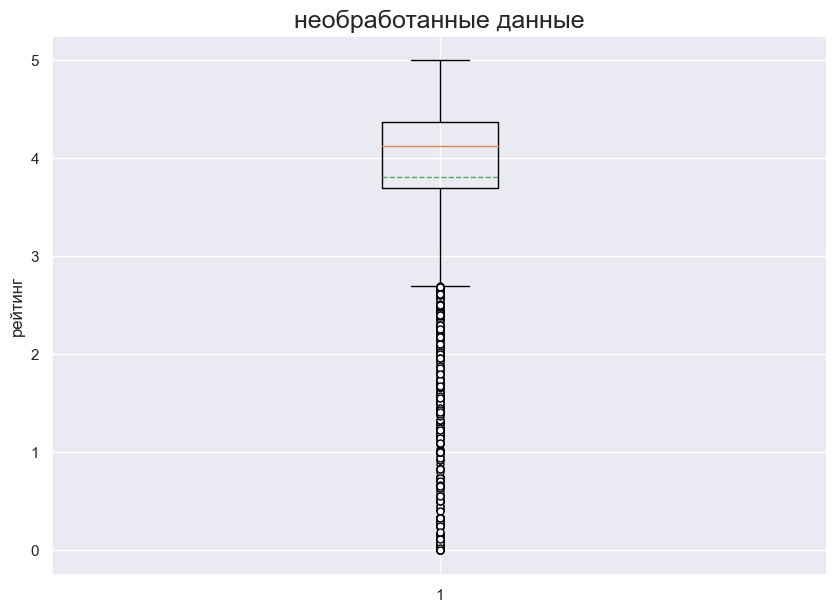

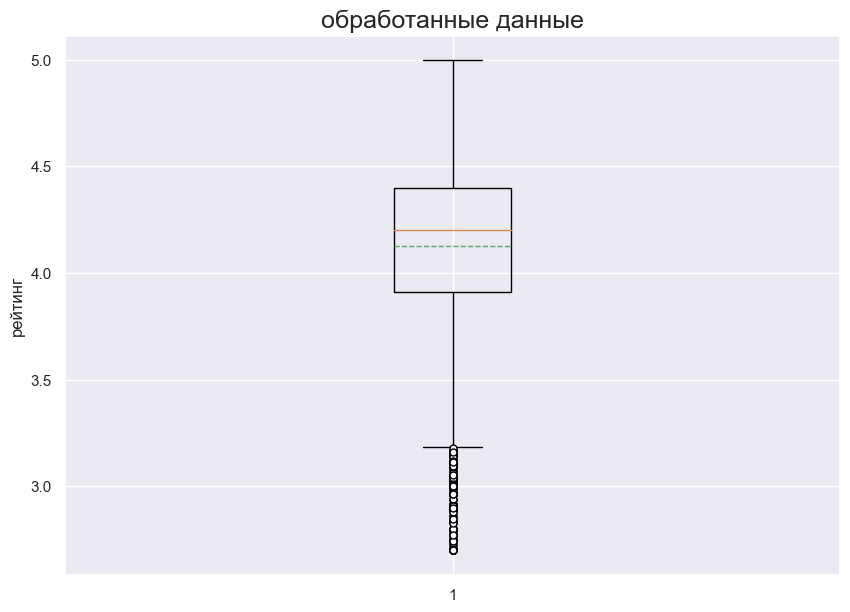

In [90]:
fig = plt.figure(figsize =(10, 7))

flierprops = dict(marker='o', markerfacecolor='white', markersize=5,
                  linestyle='none', )
plt.boxplot(df["rating"], flierprops=flierprops, meanline=True, showmeans=True)
plt.ylabel("рейтинг")
plt.title("необработанные данные", fontsize=18)

plt.show()

fig = plt.figure(figsize =(10, 7))
plt.title("обработанные данные", fontsize=18)
plt.ylabel("рейтинг")
plt.boxplot(df_clean["rating"], flierprops=flierprops, meanline=True, showmeans=True)

plt.show()